# Support Vector Machine - Regression - Non Linear Kernel

In this Jupyter notebook we're going to explore the linear kernel for SVM Regression using sklearn

| Model Name  | MAE  |
|---|---|
| Linear Regression  | 4517 |
| SVR(kernel='linear') | 4247  |


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [3]:
boston = load_boston()
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_df['MEDV'] = boston['target']
X = boston_df[['RM', 'LSTAT', 'NOX']]
y = boston_df['MEDV']

## SVM Regression with Polynomial Kernel (degree = 2)

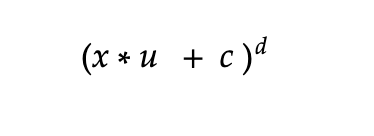

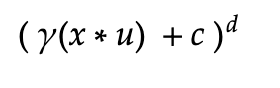

*From scikit-learn: "The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors."*

https://scikit-learn.org/stable/modules/svm.html#kernel-functions

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features.

In [4]:
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import make_pipeline

transformer = PowerTransformer(method="yeo-johnson")
svr = SVR(kernel='poly', gamma='auto', coef0=0.1, degree=2)
pipeline = make_pipeline(transformer, svr)


mae_lin = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE : {:.2f}".format(np.abs(np.mean(mae_lin))*1000))

MAE : 3283.44


## SVM Regression with RBF

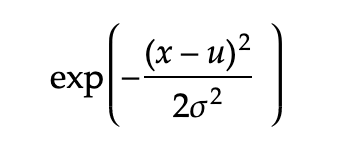

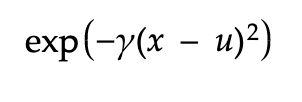

From sklearn documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?highlight=svr#sklearn.svm.SVR

In [5]:
pipeline = make_pipeline(transformer, 
                         SVR(kernel='rbf', gamma='auto'))

%time mae_lin = cross_val_score(pipeline, X, y.values.ravel(), cv=5, scoring='neg_mean_absolute_error')
print("MAE : {:.2f}".format(np.abs(np.mean(mae_lin))*1000))

CPU times: user 114 ms, sys: 3.26 ms, total: 117 ms
Wall time: 118 ms
MAE : 3717.13


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
grid = {
    'model__epsilon': [0.1, 0.5, 1, 2, 3, 4, 5],
    'model__C': [0.1, 1, 100, 200],
}

pipeline = Pipeline([("transform", transformer), 
                     ("model", SVR(kernel='rbf', gamma='auto'))])

grid_svr = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', cv=5)

In [7]:
_ = grid_svr.fit(X, y.values.ravel())

In [8]:
print("epsilon:", grid_svr.best_params_['model__epsilon'])
print("C:", grid_svr.best_params_['model__C'])

epsilon: 3
C: 100


In [9]:
pipeline = make_pipeline(transformer, 
                         SVR(kernel='rbf', gamma='auto', 
                         coef0=0.1, 
                         epsilon=grid_svr.best_params_['model__epsilon'], 
                         C=grid_svr.best_params_['model__C']))

%time mae_svr = cross_val_score(pipeline, X, y.values.ravel(), cv=5, scoring='neg_mean_absolute_error')
print("MAE : {:.2f}".format(np.abs(np.mean(mae_svr))*1000))

CPU times: user 139 ms, sys: 3.42 ms, total: 142 ms
Wall time: 182 ms
MAE : 3103.40
